#### Question-3: Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The number of new cases are increasing day by day around the world. This dataset has information from the states and union territories of India at daily level.
The dataset can also be taken from https://www.kaggle.com/sudalairajkumar/covid19-inindia.
Using the above datasets, make a report on the following points: Note: Any assumptions made should be properly mentioned in the report.
- Which age group is the most infected?
- Plot graphs of the cases observed, recovered, deaths per day country-wise and statewise.*
- Identify the positive cases on a state level. Quantify the intensity of virus spread for each state.* Intensity here means number of positive cases/population density.
- List places in the country which are active hotspots/clusters as on 10.04.2020.* Hotspot is defined as an area in a city where 10 or more people have been tested positive.
- Which states have the maximum change (consider increase and decrease separately) in number of hotspots on weekly basis from 20.03.2020 to 10.04.2020 (3 weeks).
- For the given data, identify cases with international travel history (primary case), personal contact with primary case (secondary case). Cases which do not fall in the primary and secondary fall into tertiary case. Quantify them based on the percentage for the top 5 states with maximum cases till 10.04.2020.*
- Find out the number of additional labs needed from the current existing labs (assume 100 tests per day per lab) with an increase rate of 10% cases per day from 11.04.2020 - 20.04.2020. List out any further assumptions considered.
- Plot the number of cases starting from 1st March - 10th April. Based on this plot can you comment on the popular notion of ‘flattening the curve’.*
- As we know, social distancing is the best option to avoid the spread. Based on the time series data (covid_19_india.csv), can you suggest how successful the 21 days lockdown has been?

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import *
%matplotlib inline

In [310]:
# Setting up directories
parentDirectory = 'G:\Academic\Coursework\CH5019 - Mathematical Foundations of Data Science\Term project 2020\Dataset_Question3/'
imageDirectory = 'G:\Academic\Coursework\CH5019 - Mathematical Foundations of Data Science\Term project 2020\Dataset_Question3\Images/'
os.chdir(parentDirectory)

##### Loading and copying data

In [311]:
ageGroupDetails = pd.read_csv('AgeGroupDetails.csv',index_col=0)
age = ageGroupDetails.copy(deep=True)
covid19India = pd.read_csv('covid_19_india.csv')
covid19 = covid19India.copy(deep=True); del covid19['Sno']; del covid19['Time']
del covid19['ConfirmedIndianNational']; del covid19['ConfirmedForeignNational']
covidData = pd.read_excel('covid_19_india_.xlsx')
hospitalBedsIndia = pd.read_csv('HospitalBedsIndia.csv')
hospitals = hospitalBedsIndia.copy(deep=True)
ICMRTestingDetails = pd.read_csv('ICMRTestingDetails.csv')
testing = ICMRTestingDetails.copy(deep=True)
individualDetails = pd.read_csv('IndividualDetails.csv')
person = individualDetails.copy(deep=True)
individual = pd.read_excel('IndividualDetails_.xlsx')
populationIndiaCensus2011 = pd.read_csv('population_india_census2011.csv',index_col=0)
population = populationIndiaCensus2011.copy(deep=True)

#### Answer 3.1

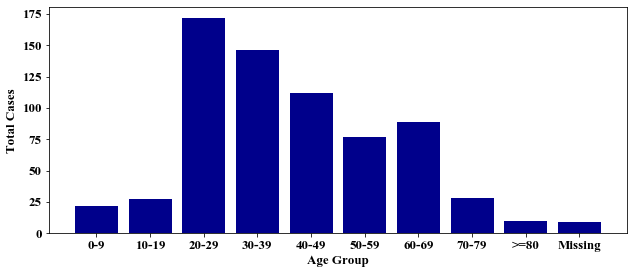

In [312]:
plt.rcParams['font.family']="Times New Roman"
plt.rcParams.update({'font.size':13})
plt.figure(figsize=(9,4))
plt.bar(age['AgeGroup'],age['TotalCases'],color='darkblue')
plt.xlabel('Age Group')
plt.ylabel('Total Cases')

#os.chdir(imageDirectory)
#plt.gcf().subplots_adjust(left=0.16); plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig('age_group.jpg',dpi=150)
#os.chdir(parentDirectory)
plt.show()

- As per the available data, the age group '20-29 years' is the most affected.

#### Answer 3.2

In [315]:
# Storing dates in sequence
Dates = []
dt = covid19['Date'][0]
Dates.append(dt)
for i in range(len(covid19)-1):
    dt = covid19['Date'][i+1]
    if dt not in Dates:
        Dates.append(dt)

# Storing names of all states
statesAndUTs = np.unique(covid19['State/UnionTerritory'])
print(statesAndUTs)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Mizoram'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Tamil Nadu' 'Telengana'
 'Tripura' 'Unassigned' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [317]:
# Storing data for cases per state per day
States = [];
for i in range(len(covid19)):
    confirmedCount = []
    for j in statesAndUTs:
        if j==covid19['State/UnionTerritory'][i]:
            count = covid19['Confirmed'][i]
        else:
            count = 0
        confirmedCount.append(count)
    States.append(confirmedCount)
States = np.array(States)

##### Country-wise data

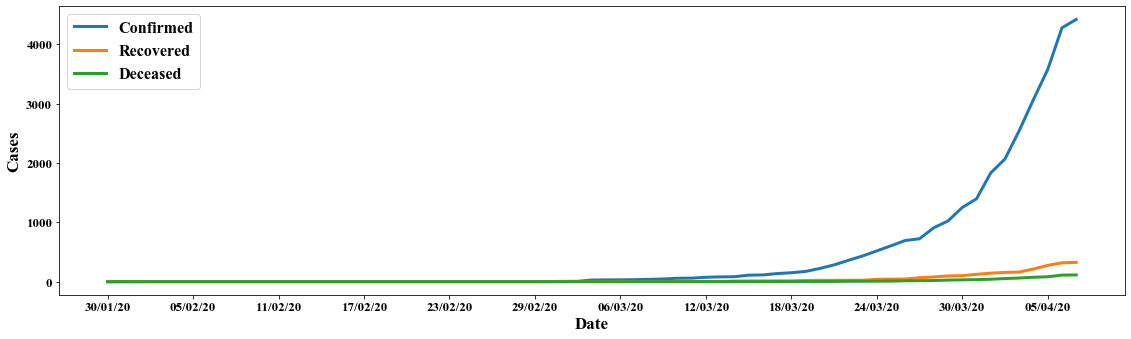

In [318]:
casesConfirmed = [0 for k in range(len(Dates))]
casesRecovered = [0 for k in range(len(Dates))]
casesDead = [0 for k in range(len(Dates))]
for i in range(len(Dates)):
    for j in range(len(covid19)):
        if covid19['Date'][j]==Dates[i]:
            casesConfirmed[i] += covid19['Confirmed'][j]
            casesRecovered[i] += covid19['Cured'][j]
            casesDead[i] += covid19['Deaths'][j]

fig = plt.figure(figsize=(16,5))
ax = plt.subplot(111)
plt.rcParams.update({'font.size':16})
plt.xlabel('Date',fontsize=17)
plt.ylabel('Cases',fontsize=17)
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(14))
ax.plot(Dates,casesConfirmed,linewidth=3)
ax.plot(Dates,casesRecovered,linewidth=3)
ax.plot(Dates,casesDead,linewidth=3)
ax.legend(('Confirmed','Recovered','Deceased'))

#os.chdir(imageDirectory)
#plt.gcf().subplots_adjust(left=0.16); plt.gcf().subplots_adjust(bottom=0.3)
#plt.savefig('country_wise.jpg',dpi=150)
#os.chdir(parentDirectory)
plt.show()

##### State-wise data

In [319]:
stateReported = np.zeros(shape=(len(Dates),len(statesAndUTs)))
stateRecovered = np.zeros(shape=(len(Dates),len(statesAndUTs)))
stateDeaths = np.zeros(shape=(len(Dates),len(statesAndUTs)))
for i in range(len(Dates)):
    for j in range(len(covid19)):
        if covid19['Date'][j]==Dates[i]:
            for k in range(len(statesAndUTs)):
                if covid19['State/UnionTerritory'][j]==statesAndUTs[k]:
                    stateReported[i,k] = covid19['Confirmed'][j]
                    stateRecovered[i,k] = covid19['Cured'][j]
                    stateDeaths[i,k] = covid19['Deaths'][j]

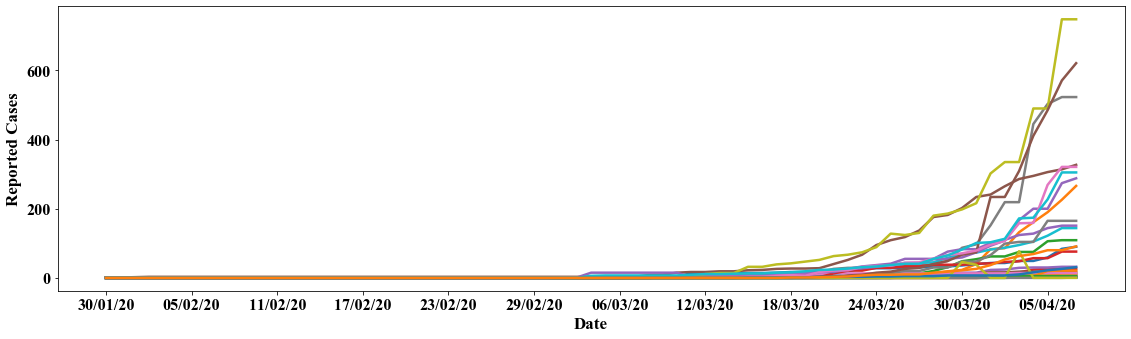

In [320]:
# Format: States[date][state]
# Reported Cases
fig = plt.figure(figsize=(16,5))
ax = plt.subplot(111)
plt.rcParams.update({'font.size':16})
plt.xlabel('Date',fontsize=17)
plt.ylabel('Reported Cases',fontsize=17)
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(14))
for i in range(len(statesAndUTs)):
    ax.plot(Dates,stateReported[:,i],label=list(statesAndUTs)[i],linewidth=2.5)
#ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.15),shadow=False,ncol=4)

#os.chdir(imageDirectory)
#plt.gcf().subplots_adjust(left=0.16); plt.gcf().subplots_adjust(bottom=0.3)
#plt.savefig('state_reported.jpg',dpi=150)
#os.chdir(parentDirectory)
plt.show()

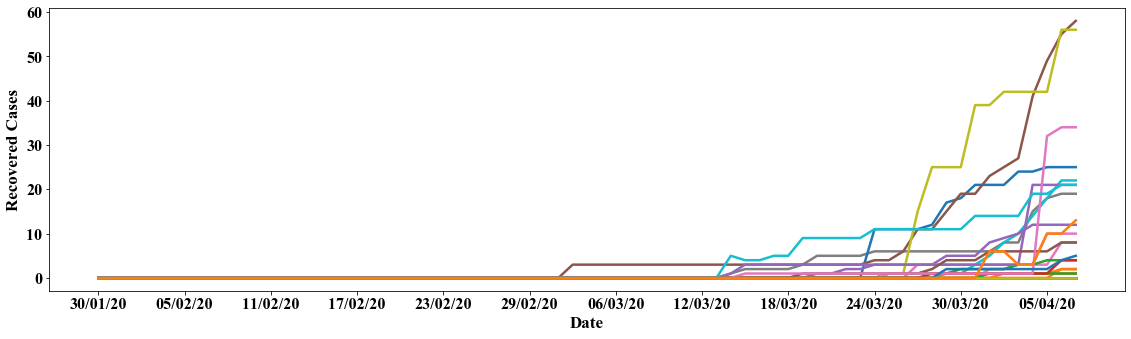

In [321]:
# Recovered Cases
fig = plt.figure(figsize=(16,5))
ax = plt.subplot(111)
plt.rcParams.update({'font.size':16})
plt.xlabel('Date',fontsize=17)
plt.ylabel('Recovered Cases',fontsize=17)
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(14))
for i in range(len(statesAndUTs)):
    ax.plot(Dates,stateRecovered[:,i],label=list(statesAndUTs)[i],linewidth=2.5)
#ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.15),shadow=False,ncol=4)

#os.chdir(imageDirectory)
#plt.gcf().subplots_adjust(left=0.16); plt.gcf().subplots_adjust(bottom=0.3)
#plt.savefig('state_recovered.jpg',dpi=150)
#os.chdir(parentDirectory)
plt.show()

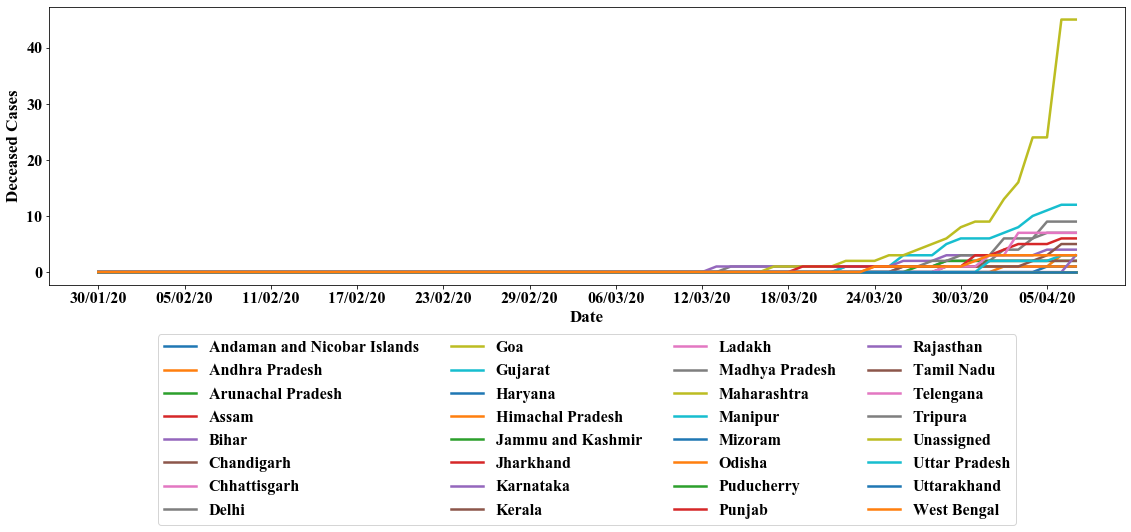

In [325]:
# Deceased Cases
fig = plt.figure(figsize=(16,8))
ax = plt.subplot(111)
plt.rcParams.update({'font.size':16})
plt.xlabel('Date',fontsize=17)
plt.ylabel('Deceased Cases',fontsize=17)
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(14))
for i in range(len(statesAndUTs)):
    ax.plot(Dates,stateDeaths[:,i],label=list(statesAndUTs)[i],linewidth=2.5)
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.15),shadow=False,ncol=4)

#os.chdir(imageDirectory)
#plt.gcf().subplots_adjust(left=0.16); plt.gcf().subplots_adjust(bottom=0.3)
#plt.savefig('state_death.jpg',dpi=150)
#os.chdir(parentDirectory)
plt.show()

In [323]:
# Function for saving images
def saveFigure(l,b,fileName):
    os.chdir(imageDirectory)
    plt.gcf().subplots_adjust(left=l); plt.gcf().subplots_adjust(bottom=b)
    plt.savefig(fileName,dpi=150)
    os.chdir(parentDirectory)

#### Answer 3.3

In [326]:
# Extracting State codes
stateCodes = {'Andaman and Nicobar Islands':'A&N', 'Andhra Pradesh':'AP',
       'Arunachal Pradesh':'AR', 'Assam':'AS', 'Bihar':'BR', 'Chandigarh':'CH',
       'Chhattisgarh':'CT', 'Delhi':'DL', 'Goa':'GA', 'Gujarat':'GJ', 'Haryana':'HR',
       'Himachal Pradesh':'HP', 'Jammu and Kashmir':'J&K', 'Jharkhand':'JH', 'Karnataka':'KA',
       'Kerala':'KL', 'Ladakh':'LA', 'Madhya Pradesh':'MP', 'Maharashtra':'MH', 'Manipur':'MN',
       'Mizoram':'MZ', 'Odisha':'OR', 'Puducherry':'PY', 'Punjab':'PB', 'Rajasthan':'RJ',
       'Tamil Nadu':'TN', 'Telengana':'TG', 'Tripura':'TR', 'Unassigned':'-',
       'Uttar Pradesh':'UP', 'Uttarakhand':'UT', 'West Bengal':'WB'}
names = list(stateCodes.keys())
codes = list(stateCodes.values())

# State names and State codes in sequence
state = []
for i in range(len(covid19)-1):
    temp = covid19['State/UnionTerritory'][i]
    if covid19['State/UnionTerritory'][i+1]!=covid19['State/UnionTerritory'][i] and covid19['State/UnionTerritory'][i] not in state:
        state.append(temp)

stateCode = []
for i in range(len(names)):
    for j in range(len(names)):
        if state[i]==names[j]:
            temp = codes[j]
            stateCode.append(temp)

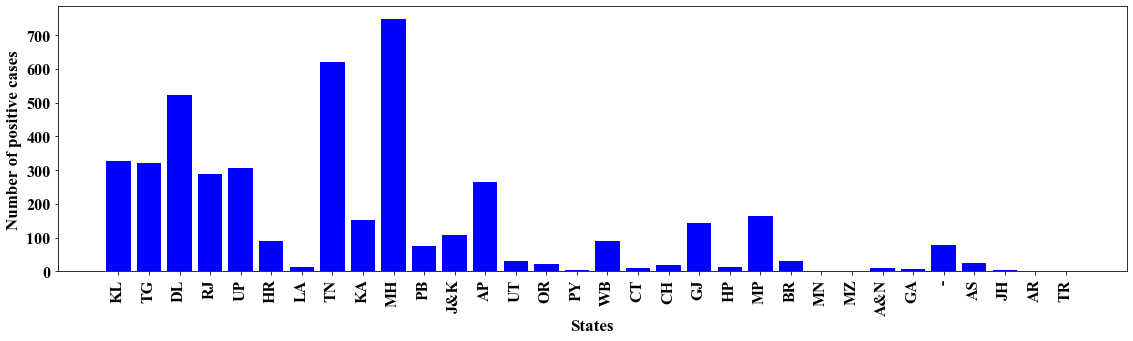

In [327]:
# State-wise positive cases
fig = plt.figure(figsize=(16,5))
ax = plt.subplot(111)
plt.rcParams.update({'font.size':15})
plt.ylabel('Number of positive cases',fontsize=17)
plt.xlabel('States',fontsize=17)
plt.xticks(rotation=90)
plt.bar(covidData['State/UnionTerritory'],covidData['Confirmed'],color='blue')
ax.set_xticklabels(stateCode)
#saveFigure(0.15,0.2,'state_positive.jpg')
plt.show()

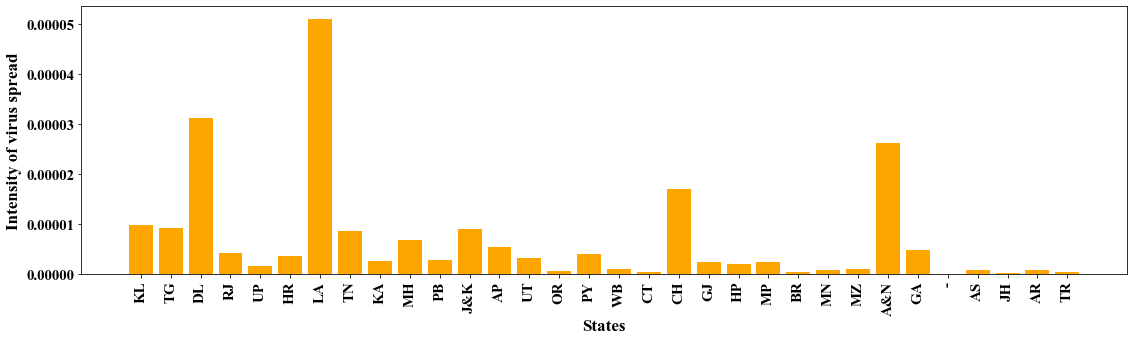

In [328]:
# Intensity of virus spread
fig = plt.figure(figsize=(16,5))
ax = plt.subplot(111)
plt.rcParams.update({'font.size':15})
plt.ylabel('Intensity of virus spread',fontsize=17)
plt.xlabel('States',fontsize=17)
plt.xticks(rotation=90)
plt.bar(covidData['State/UnionTerritory'],covidData['InfectionIntensity'],color='orange')
ax.set_xticklabels(stateCode)
#saveFigure(0.15,0.2,'state_intensity.jpg')
plt.show()

#### Answer 3.4

In [329]:
covidData2 = covidData.loc[708:739]
covidData2 = covidData2.sort_values(by='Confirmed',ascending=True)

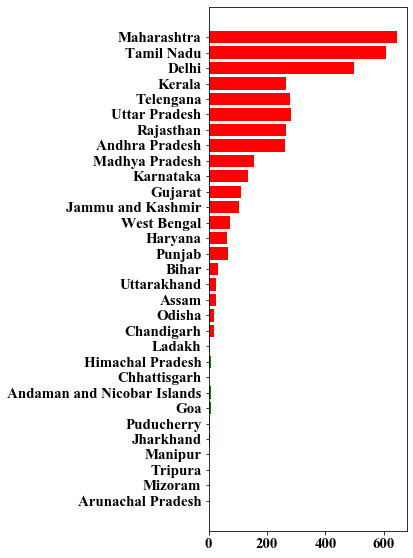

In [330]:
# Active hotspots/clusters as on 07/04/2020
fig = plt.figure(figsize=(6,8))
rcParams.update({'figure.autolayout':True})
ax = plt.subplot(111)
plt.rcParams.update({'font.size':15})
plt.xticks(rotation=0)
y = covidData2['Confirmed']-covidData2['Cured']-covidData2['Deaths']
plt.barh(covidData2['State/UnionTerritory'],y,color=np.where(y>10,'red','g'))
#saveFigure(0.15,0.2,'hotspot.jpg')
plt.show()

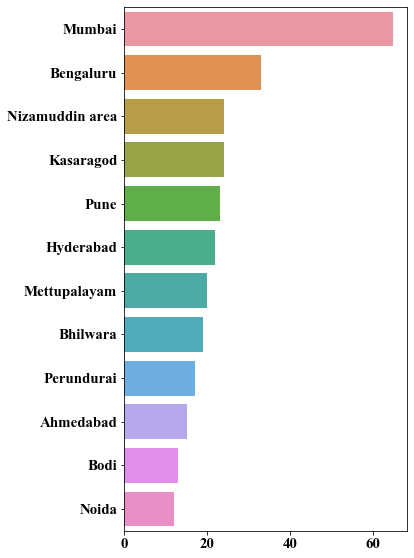

In [331]:
# Hotspot cities
fig = plt.figure(figsize=(6,8))
rcParams.update({'figure.autolayout':True})
ax = plt.subplot(111)
plt.rcParams.update({'font.size':15})
plt.xticks(rotation=0)
z6 = individual.loc[individual['current_status']=='Hospitalized']
x6 = z6['detected_city'].value_counts()
y_6=x6>10
y6=x6[y_6]
sns.barplot(y6.values,y6.index)
#saveFigure(0.15,0.2,'area_hotspot.jpg')
plt.show()

#### Answer 3.5

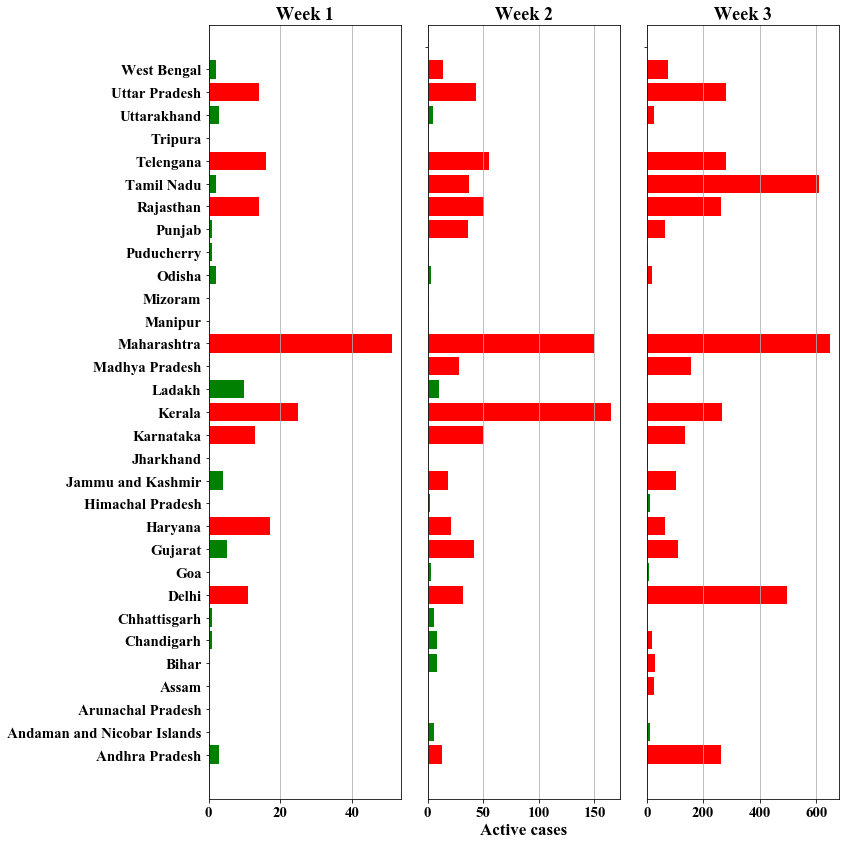

In [332]:
# States have the maximum change in number of hotspots on weekly basis
week1_20MAR = covidData.loc[228:258]
week2_28MAR = covidData.loc[419:449]
week3_4APR = covidData.loc[708:738]

x_week1 = week1_20MAR['InfectedStates_20Mar']
y_week1 = week1_20MAR['No_20Mar']-week1_20MAR['Deaths_20Mar']-week1_20MAR['Cured_20Mar']

x_week2 = week2_28MAR['InfectedStates_20Mar']
y_week2 = week2_28MAR['No_20Mar']-week2_28MAR['Deaths_20Mar']-week2_28MAR['Cured_20Mar']

x_week3 = week3_4APR['State/UnionTerritory']
y_week3 = week3_4APR['Confirmed']-week3_4APR['Cured']-week3_4APR['Deaths']

plt.figure(figsize=(12, 12))
plt.rcParams.update({'font.size':15})

plt.subplot(1,3,1)
Plot_week1= plt.barh(x_week1,y_week1,color=np.where(y_week1>10, 'red', 'g'))
plt.gca().xaxis.grid(True)
plt.title('Week 1')

plt.subplot(1,3,2)
Plot_week2= plt.barh(x_week1,y_week2,color=np.where(y_week2>10, 'red', 'g'))
plt.xlabel('Active cases',fontsize=17)
plt.yticks(" ")
plt.gca().xaxis.grid(True)
plt.title('Week 2')

plt.subplot(1,3,3)
Plot_week3= plt.barh(x_week1,y_week3,color=np.where(y_week3>10, 'red', 'g'))
plt.yticks(" ")
plt.gca().xaxis.grid(True)
plt.title('Week 3')

#saveFigure(0.15,0.2,'hotspot_change.jpg')
plt.show()

#### Answer 3.6

In [333]:
y = individual.loc[(individual['current_status']=='Hospitalized')]
x = y['detected_state'].value_counts()
print("Top 5 states with maximum cases:")
print(x[:5])

Top 5 states with maximum cases:
Maharashtra    631
Tamil Nadu     482
Delhi          441
Telangana      270
Kerala         262
Name: detected_state, dtype: int64


Text(0.5, 1.0, 'Kerala')

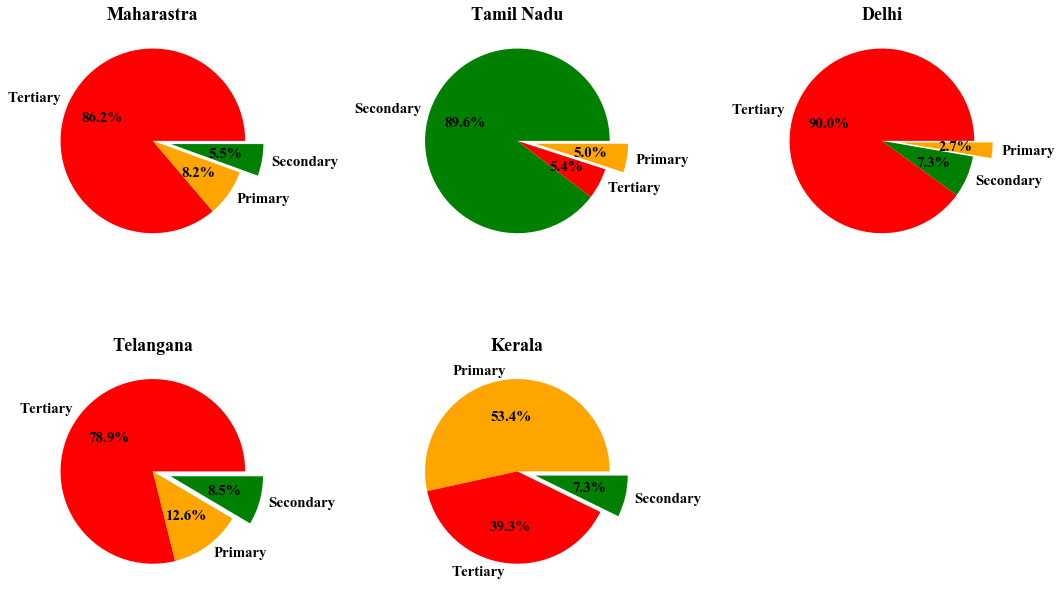

In [334]:
# Extracting data from the top 5 states
y8_1 = individual.loc[(individual['current_status'] == 'Hospitalized') & (individual['detected_state'] == 'Maharashtra')]
y8_1_1 = y8_1['Travel Category'].value_counts()
y8_2 = individual.loc[(individual['current_status'] == 'Hospitalized') & (individual['detected_state'] == 'Tamil Nadu')]
y8_2_1 =  y8_2['Travel Category'].value_counts()
y8_3 = individual.loc[(individual['current_status'] == 'Hospitalized') & (individual['detected_state'] == 'Delhi')]  
y8_3_1 =  y8_3['Travel Category'].value_counts()
y8_4 = individual.loc[(individual['current_status'] == 'Hospitalized') & (individual['detected_state'] == 'Telangana')]  
y8_4_1 =  y8_4['Travel Category'].value_counts()
y8_5 = individual.loc[(individual['current_status'] == 'Hospitalized') & (individual['detected_state'] == 'Kerala')]  
y8_5_1 =  y8_5['Travel Category'].value_counts()

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.pie(y8_1_1.values, labels= y8_1_1.index, explode= (0,0,0.2),autopct='%1.1f%%', colors = ['red','orange','green'])
plt.title('Maharastra')

plt.subplot(2,3,2)
plt.pie(y8_2_1.values, labels= y8_2_1.index, explode= (0,0,0.2),autopct='%1.1f%%', colors = ['green','red','orange'])
plt.title('Tamil Nadu')

plt.subplot(2,3,3)
plt.pie(y8_3_1.values, labels= y8_3_1.index, explode= (0,0,0.2),autopct='%1.1f%%', colors = ['red','green','orange'])
plt.title('Delhi')

plt.subplot(2,3,4)
plt.pie(y8_4_1.values, labels= y8_4_1.index, explode= (0,0,0.2),autopct='%1.1f%%', colors = ['red','orange','green'])
plt.title('Telangana')

plt.subplot(2,3,5)
plt.pie(y8_5_1.values, labels= y8_5_1.index, explode= (0,0,0.2),autopct='%1.1f%%', colors = ['orange','red','green'])
plt.title('Kerala')

#saveFigure(0.14,0.2,'pie_chart_PST.jpg')

#### Answer 3.7

In [335]:
# Number of additional labs needed
activeCases = 8453   # Active cases as on 11.04.20 (data collected from internet)
List = [activeCases]
for i in range(9):
    activeCases *= 1.1
    List.append(int(activeCases))

newCasesPerDay = [List[k+1]-List[k] for k in range(len(List)-1)]  # Active cases upto 20.04.20 based on 10% rise everyday
newCasesPerDay=np.array(newCasesPerDay)
print("New cases each day with 10% rise:",newCasesPerDay)

existingTestLabs = 10         # data collected from https://www.livemint.com/news/india/coronavirus-update-here-is-a-list-of-114-covid-19-testing-labs-in-india-11584946092240.html
testsPerDay = existingTestLabs*100
newCasesPerDay-testsPerDay>0

casesAccumulated = 0
for i in range(len(newCasesPerDay)):
    if (newCasesPerDay[i]-testsPerDay)>0:
        casesAccumulated = casesAccumulated+newCasesPerDay[i]-testsPerDay
additionalLabs = casesAccumulated/100  # Considering 100 test per day per lab
print(str(int(additionalLabs))+" new labs are required on 20.04.2020 to handle the rise in cases.")

New cases each day with 10% rise: [ 845  930 1022 1126 1237 1362 1497 1647 1812]
27 new labs are required on 20.04.2020 to handle the rise in cases.


#### Answer 3.8

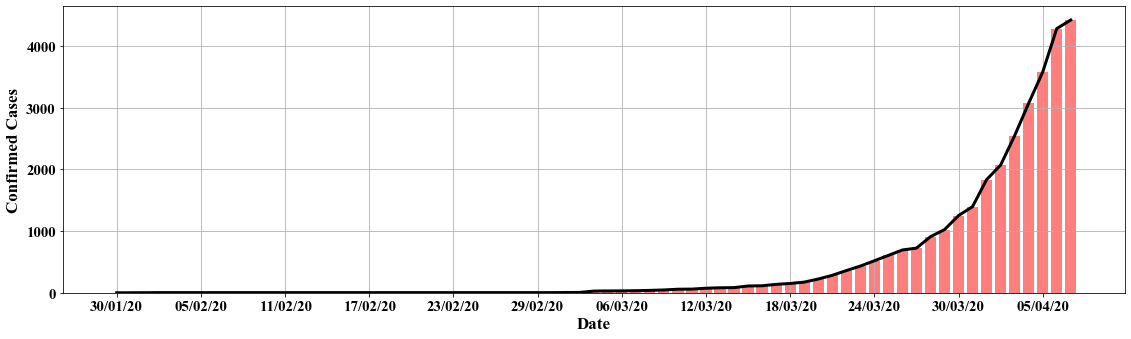

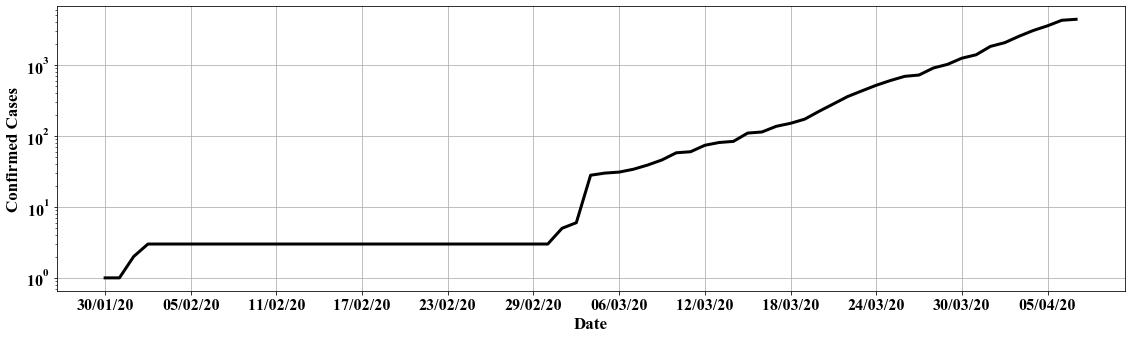

In [336]:
fig = plt.figure(figsize=(16,5))
ax = plt.subplot(111)
plt.rcParams.update({'font.size':16})
plt.xlabel('Date',fontsize=17)
plt.ylabel('Confirmed Cases',fontsize=17)
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(14))
ax.plot(Dates,casesConfirmed,linewidth=3,color='k')
ax.bar(Dates,casesConfirmed,color='red',alpha=0.5)
plt.grid()
#os.chdir(imageDirectory)
#plt.gcf().subplots_adjust(left=0.12); plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig('cumulative_cases.jpg',dpi=150)
#os.chdir(parentDirectory)
plt.show()

fig = plt.figure(figsize=(16,5))
ax = plt.subplot(111)
plt.rcParams.update({'font.size':16})
plt.xlabel('Date',fontsize=17)
plt.ylabel('Confirmed Cases',fontsize=17)
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(14))
ax.plot(Dates,casesConfirmed,linewidth=3,color='k')
ax.set_yscale('log')
plt.grid()
#os.chdir(imageDirectory)
#plt.gcf().subplots_adjust(left=0.12); plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig('logplot_cumulative.jpg',dpi=150)
#os.chdir(parentDirectory)
plt.show()

- 34 days for 0 to 10
- 12 days for 10 to 100
- 13 days for 100 to 1000

#### Answer 3.9

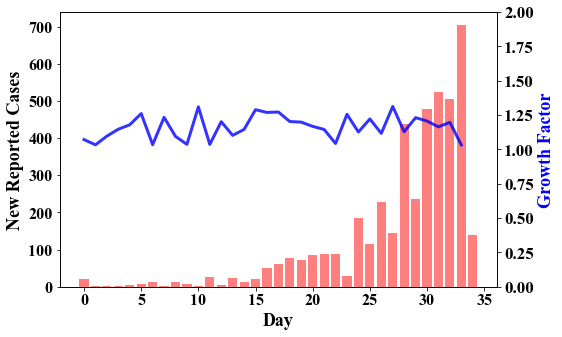

Mean Growth Factor = 1.1636465102675384
Mean Growth Factor before lockdown = 1.1603783402564085
Mean Growth Factor after lockdown = 1.1811300179772068
Maximum Growth Factor = 1.3128131710808877;   Minimum Growth Factor = 1.032702639570194


In [337]:
# Growth Factor
newCases = [casesConfirmed[i+34]-casesConfirmed[i+33] for i in range(len(casesConfirmed)-34)]
growthFactor = [casesConfirmed[i+35]/casesConfirmed[i+34] for i in range(len(casesConfirmed)-35)]
meanGF = np.mean(growthFactor)
fig,ax = plt.subplots(figsize=(8,5))
ax.bar(range(len(newCases)),newCases,color='red',alpha=0.5)
plt.rcParams.update({'font.size':17})
ax.set_xlabel('Day',fontsize=18)
ax.set_ylabel('New Reported Cases',fontsize=18)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(8))
ax2=ax.twinx()
ax2.plot(range(len(growthFactor)),growthFactor,color='blue',alpha=0.8,linewidth=3)
ax2.set_ylabel('Growth Factor',fontsize=18,color='blue')
plt.ylim([0,2])

#os.chdir(imageDirectory)
#plt.gcf().subplots_adjust(left=0.12); plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig('growth_factor.jpg',dpi=150)
#os.chdir(parentDirectory)
plt.show()
print("Mean Growth Factor = "+str(meanGF))
print("Mean Growth Factor before lockdown = "+str(np.mean(growthFactor[:22])))
print("Mean Growth Factor after lockdown = "+str(np.mean(growthFactor[23:])))
print("Maximum Growth Factor = "+str(max(growthFactor))+";   Minimum Growth Factor = "+str(min(growthFactor)))

In [338]:
# Model prediction
dateIndex = Dates.index('25/03/20')
a = casesConfirmed[dateIndex]
print("Cases confirmed on 25/03/2020 = {:0.0f}".format(a))
b = growthFactor[23]
print("Growth factor on 25/03/2020 = {:0.3f}".format(b))
x = 13  # Prediction made for cases after 13 days (April 7th)
y=a*(b**x)
print("Predicted cases on 07/04/2020 = {:0.0f}".format(y))
print("Actual cases on 07/04/2020 = {:0.0f}".format(casesConfirmed[-1]))

Cases confirmed on 25/03/2020 = 606
Growth factor on 25/03/2020 = 1.256
Predicted cases on 07/04/2020 = 11674
Actual cases on 07/04/2020 = 4421
